# Rental List Classification

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ggplot import *
import seaborn as sns
from colour import Color
import re
import collections
%matplotlib inline

In [2]:
# read in the training data set
train_set = pd.read_json(r'..\data\train.json')
test_set = pd.read_json(r'..\data\test.json')
print("Read in training data set with size of {} * {}".format(train_set.shape[0], train_set.shape[1]))
print("Read in testing data set with size of {} * {}".format(test_set.shape[0], test_set.shape[1]))

Read in training data set with size of 49352 * 15
Read in testing data set with size of 74659 * 14


In [3]:



# seperate the features and the response
train_X = train_set.drop('interest_level', axis=1)
train_y = train_set['interest_level']


In [4]:
test_set.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address'],
      dtype='object')

In [5]:
train_set.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


## Data explorary analysis

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64


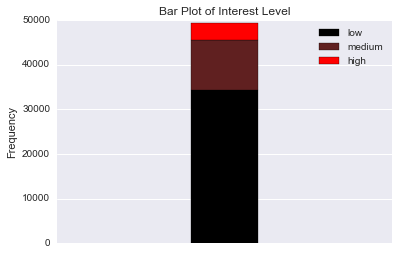

In [6]:
# Response var: interest_level
interest_level_count = train_set['interest_level'].value_counts()
print(interest_level_count)

# creaate gradient color bar for interest levels
red = Color("black")
level_c = list(red.range_to(Color("red"),len(interest_level_count)))



ax = plt.subplot(1, 1, 1)
for i in range(len(interest_level_count)): 
    ax.bar(0.2, interest_level_count[i], width=0.1, bottom=sum(interest_level_count[0:i]), label=interest_level_count.index[i], 
           color = level_c[i].rgb)
           
ax.set(xlim=(0, 0.5), xticks=(), title='Bar Plot of Interest Level', ylabel='Frequency')
plt.legend()
plt.show()


Descriptive stats of bb_ratio: 

count    49352.000000
mean         1.262346
std          0.874721
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
dtype: float64


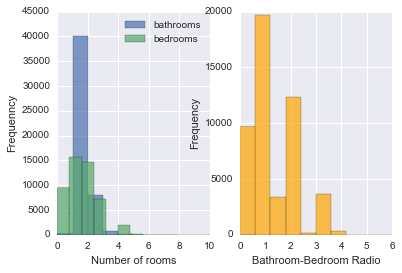

In [7]:
# Number of bedrooms, bathrooms
# create a new var: bathroom-bedroom ratio
# for those do not have a bedroom, assume they are studio and set the number of bedrooms to 1
bb_ratio = train_set['bedrooms'] / train_set['bathrooms'].apply(lambda x: x if x != 0 else 1)
print("Descriptive stats of bb_ratio: \n")
print(bb_ratio.describe())



for room in ('bathrooms', 'bedrooms'):
    ax = plt.subplot(1, 2, 1)
    train_set[room].hist(alpha=0.7, label=room)
ax.set(xlabel='Number of rooms', ylabel='Frequenncy')
ax.legend(loc=1)

ax = plt.subplot(1, 2, 2)
ax.hist(bb_ratio, color='orange', alpha=0.7)
ax.set(xlabel='Bathroom-Bedroom Radio', ylabel='Frequency')
plt.show()


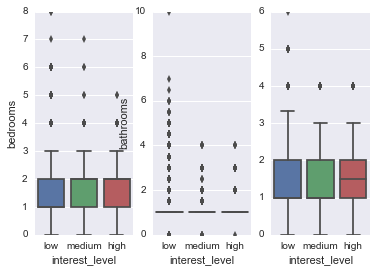

In [8]:
# Boxplots of number of bedroom, bathrooms and bb_ratio faceted by interest level
ax = plt.subplot(1, 3, 1)
sns.boxplot(x='interest_level', y='bedrooms', data=train_set, ax=ax, order=('low', 'medium', 'high'))
ax = plt.subplot(1, 3, 2)
sns.boxplot(x='interest_level', y='bathrooms', data=train_set, ax=ax, order=('low', 'medium', 'high'))
ax = plt.subplot(1, 3, 3)
sns.boxplot(x=train_set['interest_level'], y=bb_ratio, ax=ax,order=('low', 'medium', 'high'))
plt.show()


In [9]:
# longitute and latitude
print('Stats of the vars: longitude, latitude:')
print(train_set[['longitude', 'latitude']].describe())

# find potential outliers with longitude = 0
print('\nStats of latitude when longitude = 0:')
print(train_set[train_set['longitude']==0]['latitude'].describe())
print('\ninteset levels when longitude = 0:')
print(train_set[train_set['longitude']==0]['interest_level'].value_counts())



Stats of the vars: longitude, latitude:
          longitude      latitude
count  49352.000000  49352.000000
mean     -73.955716     40.741545
std        1.177912      0.638535
min     -118.271000      0.000000
25%      -73.991700     40.728300
50%      -73.977900     40.751800
75%      -73.954800     40.774300
max        0.000000     44.883500

Stats of latitude when longitude = 0:
count    12
mean      0
std       0
min       0
25%       0
50%       0
75%       0
max       0
Name: latitude, dtype: float64

inteset levels when longitude = 0:
low       11
medium     1
Name: interest_level, dtype: int64


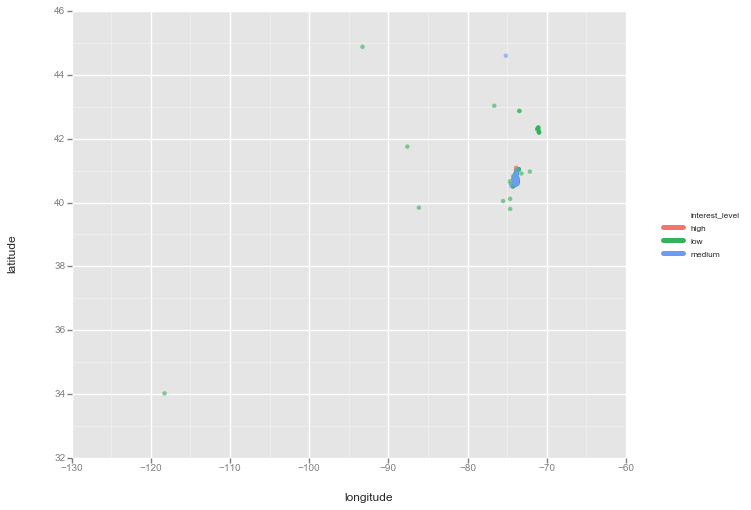

<ggplot: (-9223371938217675772)>


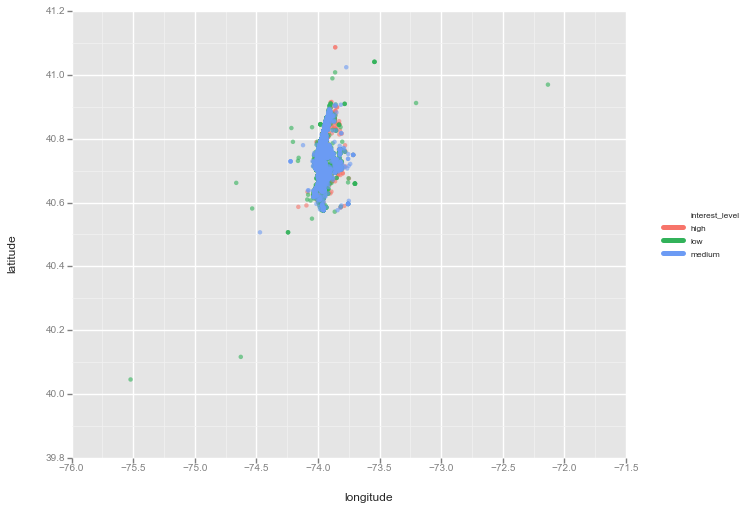

<ggplot: (98635864268)>


In [10]:
def zoomin_ll(data, condition):
    g = ggplot(data[condition], aes(x='longitude', y='latitude', color='interest_level')) + \
        geom_jitter(alpha=0.6)
    return g



# Let's zoom in (remove longitude = 0)
cond1 = train_set['longitude'] != 0
g1 = zoomin_ll(train_set, cond1)

# let's furthur zoom in (longtitude: 40~42, latitude: -80~-70)
cond2 = (train_set['latitude']<=42) & (train_set['latitude']>=40) & (train_set['longitude']>=-80) & (train_set['longitude']<=-70)
g2 = zoomin_ll(train_set, cond2)

print(g1)
print(g2)



In [11]:
# price
print('Stats of Price:')
print(train_set['price'].describe())
print('\nThe 10 cheapest prices are:')
print(sorted(train_set['price'])[:10])
print('\nThe 10 most expensive prices are:')
print(sorted(train_set['price'], reverse=True)[:10])



Stats of Price:
count      49352.000000
mean        3830.174036
std        22066.865885
min           43.000000
25%         2500.000000
50%         3150.000000
75%         4100.000000
max      4490000.000000
Name: price, dtype: float64

The 10 cheapest prices are:
[43, 45, 401, 695, 695, 695, 695, 700, 800, 868]

The 10 most expensive prices are:
[4490000, 1150000, 1070000, 1070000, 135000, 111111, 100000, 90000, 85000, 80000]


In [12]:
# use the Tukey Method to identify potential outliers in price
def turkey_outlier(data, var, alpha, outlier=True):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    if outlier:
        return data[(data[var] < (q1-alpha*(q3-q1)))], data[(data[var] > q3+alpha*(q3-q1))]
    else:
        return data[(data[var] >= (q1-alpha*(q3-q1))) & (data[var] <= q3+alpha*(q3-q1))]
price_lowoutliers, price_highoutliers = turkey_outlier(train_set, 'price', 1.5, True) # 2788 potential outliers
price_noout = turkey_outlier(train_set, 'price', 1.5, False)
print('There are {} low outliers and {} high outliers'.format(len(price_lowoutliers), len(price_highoutliers)))

print(price_lowoutliers['interest_level'].value_counts())
print(price_highoutliers['interest_level'].value_counts())

There are 2 low outliers and 2786 high outliers
low    2
Name: interest_level, dtype: int64
low       2572
medium     193
high        21
Name: interest_level, dtype: int64


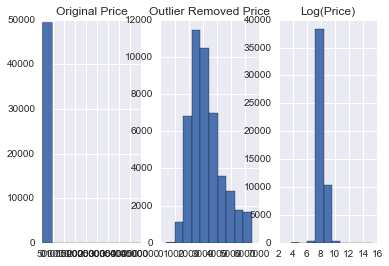

In [13]:
# hist of original price, outlier removed price and log(price)
ax = plt.subplot(1, 3, 1)
train_set['price'].hist()
ax.set(title='Original Price')
ax = plt.subplot(1, 3, 2)
price_noout['price'].hist()
ax.set(title='Outlier Removed Price')
ax = plt.subplot(1, 3, 3)
np.log(train_set['price']).hist()
ax.set(title='Log(Price)')
plt.show()


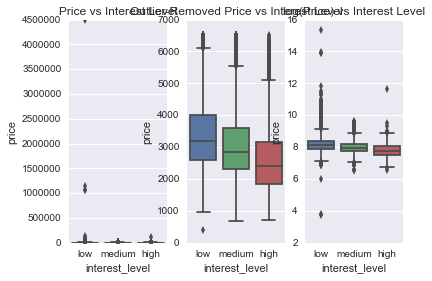

In [14]:
# price vs interest level
ax = plt.subplot(1, 3, 1)
sns.boxplot(x='interest_level', y='price', data=train_set, order=('low', 'medium', 'high'))
ax.set(title='Price vs Interest Level')
ax = plt.subplot(1, 3, 2)
sns.boxplot(x='interest_level', y='price', data=price_noout, order=('low', 'medium', 'high'))
ax.set(title='Outlier-Removed Price vs Interest Level')
ax = plt.subplot(1, 3, 3)
sns.boxplot(x=train_set['interest_level'], y=np.log(train_set['price']), order=('low', 'medium', 'high'))
ax.set(title='log(Price) vs Interest Level')
plt.show()

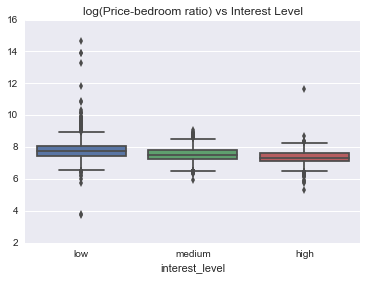

In [15]:
# price_bedroom ratio
price_bedroom_ratio = train_set['price']/train_set['bedrooms'].apply(lambda x: x if x !=0 else 1)
ax = plt.subplot(1, 1, 1)
sns.boxplot(x=train_set['interest_level'], y=np.log(price_bedroom_ratio), order=('low', 'medium', 'high'))
ax.set(title='log(Price-bedroom ratio) vs Interest Level')
plt.show()

In [16]:
# features
# number of features
num_features = train_set['features'].apply(len)
print('Stats of number of features:')
print(num_features.describe())

print('\nLongest Features:')
print(list(train_set['features'][train_set['features'].apply(len) == max(train_set['features'].apply(len))]))


Stats of number of features:
count    49352.000000
mean         5.428473
std          3.923411
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         39.000000
Name: features, dtype: float64

Longest Features:
[['Common Outdoor Space', 'Laundry In Unit', 'Cats Allowed', 'Private Outdoor Space', 'Dogs Allowed', 'Parking Space', 'Doorman', 'Elevator', 'Fitness Center', 'Laundry In Building', 'Concierge', 'Garage', 'Green Building', 'Health Club', 'High Speed Internet', 'Laundry', 'Lounge', 'New Construction', 'Roof Deck', 'Storage', 'Subway', 'Valet', 'Wheelchair Access', 'WiFi', 'Balcony', 'Dishwasher', 'Eat In Kitchen', 'Garden', 'Granite Kitchen', 'Hardwood', 'High Ceilings', 'Light', 'Live Work', 'Marble Bath', 'Outdoor Space', 'Patio', 'Renovated', 'Walk-In Closet', 'Walls OK']]


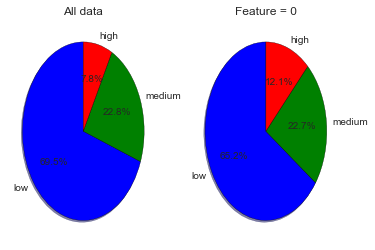

In [17]:
# let's look at those with 0 features
feature0_counts = train_set[train_set['features'].apply(len)==0]['interest_level'].value_counts()


ax1 = plt.subplot(1, 2, 1)
ax1.pie(interest_level_count, labels=interest_level_count.index, startangle=90, autopct='%1.1f%%', shadow=True)
ax1.set(title='All data')

ax2 = plt.subplot(1, 2, 2)
ax2.pie(feature0_counts, labels=feature0_counts.index, startangle=90, autopct='%1.1f%%', shadow=True)
ax2.set(title='Feature = 0')
plt.show()

In [19]:
# unique features
uniq_feat = set()
for f in train_set['features']:
    uniq_feat = uniq_feat.union(set(f))
print(len(uniq_feat))
list(uniq_feat)[:10]

1556


['Stone countertops',
 '3br',
 'Pet friendly ( case by case )',
 'laundry & housekeeping',
 '** NO FEE MULTI-LEVEL MANSION! * MASSIVE 3BR TRIPLEX * HUGE PRIVATE TERRACE * E50s & PARK AVE * ELEV/LNDRY BLDG **',
 'bicycle storage',
 'Mins From Train',
 'Rent includes cable tv and wireless internet',
 'laundry room as well as housekeeping & dry-cleaning services',
 'Super On Site']

In [20]:
# 1 feature
feature1 = train_set[train_set['features'].apply(len)==1]['features']
sorted(feature1, key=lambda x: len(x[0]), reverse=True)[:10]


[['** HEART OF THE VILLAGE! * MASSIVE 3BR SUPER SHARE * MR CLEAN APPROVED * ORNATE PREWAR DETAILS * GOURMET KITCHEN * TONS OF SUNLIGHT **'],
 ['** COURT SQUARE GEM! * SPRAWLING SUNDRENCHED 2BR HOME * CUSTOM FINISHES * DISHWASHER * FIREPLACES * EAT-IN KITCHEN * BAY WINDOWS **'],
 ['** ELEGANT E50s!! * SPRAWLING SUNDRENCHED 2BR HOME * FRENCH DRS * BREAKFAST BAR * DISHWASHER * EAT-IN KITCHEN * WALK-IN CLOSETS! **'],
 ['** THE PERFECT SHARE! * HUGE TRUE 3BR HOME * GOURMET KITCHEN * TONS OF NATURAL LIGHT * 2 BLKS TO WATERFRONT & BEDFORD L STOP **'],
 ['** SPRAWLING TRUE 3BR SUPER SHARE * FIT FOR KINGS! * UNIQUE RENOVATIONS * STEPS TO THE WATERFRONT * 1 BLK TO BEDFORD L STOP **'],
 ['** BROWNSTONE BEAUTY * MASSIVE 2BR HOME * STEPS TO THE PARK * SS KITCHEN * DISHWASHER * OVERSIZED CLOSETS * NEAR COLUMBIA U **'],
 ['** OVERSIZED & UNDERPRICED!! * SPRAWLING SUNFILLED STUDIO * GOURMET KITCHEN * GUT RENOVATED * W50s ~ NEAR CENTRAL PARK! **'],
 ['** W70s WINNER! * SUPER SWEET STUDIO * WALLS OF WIN

In [65]:
def feature_clean(feature_list):
    # some features are separated by '*' '.', '^' clean those features
    for ff in feature_list: 
        if any(x in ff for x in ('*', '.', '^')):
            feature_list.remove(ff)
            ff = re.sub('[*|^|.]+', ',', feature_list[0])
            # remove the ',' at the beginning and at the end of the string
            ff = re.sub('^[,]|[,]$', '', ff)
            feature_list += ff.split(',')
    # clean the text, strip and lower case
    return [f.strip().lower() for f in feature_list]

feature = train_set['features'].apply(feature_clean)

In [66]:
feature.head()
feature11 = feature[feature.apply(len)==1]
sorted(feature11, key=lambda x: len(x[0]), reverse=True)[:10]


[['offering  1 month free or 1 month op'],
 ['parking spot with additional fee'],
 ['wood-burning fireplace'],
 ['private outdoor space'],
 ['private outdoor space'],
 ['private outdoor space'],
 ['private outdoor space'],
 ['private outdoor space'],
 ['private outdoor space'],
 ['private outdoor space']]

In [67]:
train_set['features'] = feature


In [84]:
# All features
def get_features(feat):
    feature_list = []
    for f in feat:
        if f != []:
            feature_list += f
    return feature_list


feat = get_features(train_set['features'])


uniq_feat = set(feat)
print(len(uniq_feat))
list(uniq_feat)[:10]

#number of unique features from 1556 to 1186

1186


['sprawling 3br super share',
 'unassigned paid parking available nearby',
 '3br',
 'outdoor space (private roof deck)',
 'direct bus line to ferry',
 'private roof deck',
 'huge 1 bedroom',
 'washer and dryer in unit',
 'leed certificate gold',
 'bicycle storage']

In [92]:
# feature frequency
def feat_freq(feat, n_feat=20):
    '''Find feature frequency'''
    feature_list = get_features(feat)    
    feat_counts = collections.Counter(feature_list)
    return sorted(feat_counts.items(), key = lambda x: x[1], reverse=True)[:n_feat]

print(feat_freq(train_set['features']))
print(feat_freq(train_set[train_set['interest_level']=='low']['features']))
print(feat_freq(train_set[train_set['interest_level']=='medium']['features']))
print(feat_freq(train_set[train_set['interest_level']=='high']['features']))

[('elevator', 26300), ('cats allowed', 23631), ('hardwood floors', 23559), ('dogs allowed', 22035), ('doorman', 20969), ('dishwasher', 20810), ('laundry in building', 18955), ('no fee', 18102), ('fitness center', 13258), ('laundry in unit', 9464), ('pre-war', 9149), ('roof deck', 6555), ('outdoor space', 5270), ('dining room', 5151), ('high speed internet', 4299), ('balcony', 3058), ('swimming pool', 2730), ('new construction', 2608), ('terrace', 2313), ('exclusive', 2168)]
[('elevator', 18308), ('cats allowed', 17105), ('dogs allowed', 16083), ('doorman', 15354), ('hardwood floors', 14773), ('dishwasher', 13598), ('laundry in building', 12047), ('no fee', 10963), ('fitness center', 9555), ('pre-war', 6649), ('laundry in unit', 6267), ('roof deck', 4346), ('dining room', 3261), ('outdoor space', 3227), ('high speed internet', 2668), ('balcony', 1974), ('swimming pool', 1875), ('new construction', 1706), ('terrace', 1476), ('exclusive', 1476)]
[('hardwood floors', 6796), ('elevator', 61

In [79]:
# 20 most frequent features
train_set['features'].head()

10                                                       []
10000     [doorman, elevator, fitness center, cats allow...
100004    [laundry in building, dishwasher, hardwood flo...
100007                            [hardwood floors, no fee]
100013                                            [pre-war]
Name: features, dtype: object